In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

df = pd.read_csv("combined_puzzle_data.csv")
df

,grid_rows,grid_cols,num_obstacles,path_length,num_turns,time_to_solve,difficulty_label
0,5,5,8,9,1,12.94,easy
1,5,5,8,9,1,10.02,easy
2,5,5,8,9,1,8.19,easy
3,8,8,12,15,3,9.48,easy
4,8,8,16,15,6,19.53,medium
...,...,...,...,...,...,...,...
118,5,5,8,9,4,4.28,easy
119,5,6,7,10,4,4.94,easy
120,5,9,27,13,5,4.75,easy
121,5,7,8,11,3,4.56,easy


📊 Classification Report:

              precision    recall  f1-score   support

        easy       0.92      1.00      0.96        12
        hard       1.00      0.80      0.89         5
      medium       1.00      1.00      1.00         8

    accuracy                           0.96        25
   macro avg       0.97      0.93      0.95        25
weighted avg       0.96      0.96      0.96        25



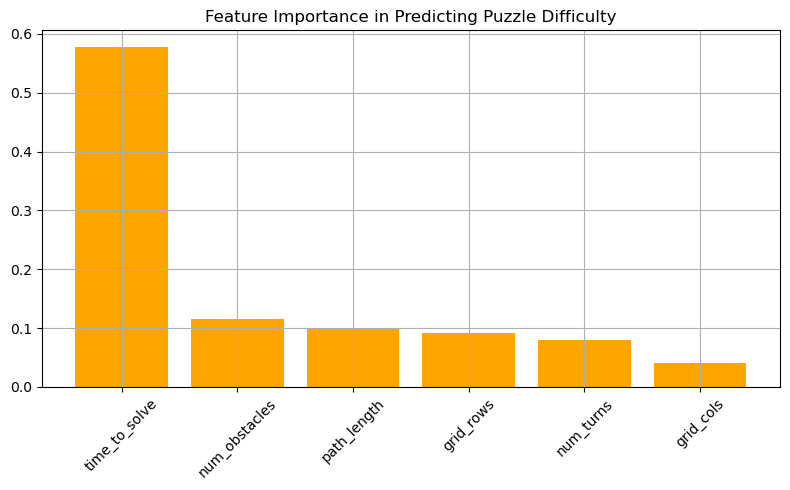

In [85]:
# We separated features and target
X = df.drop(columns=["difficulty_label"])
y = df["difficulty_label"]

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Train the Random Forest Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Feature importance
importances = clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plotting the feature importance
plt.figure(figsize=(8, 5))
plt.bar(range(len(importances)), importances[indices], align="center", color="orange")
plt.xticks(range(len(importances)), features[indices], rotation=45)
plt.title("Feature Importance in Predicting Puzzle Difficulty")
plt.tight_layout()
plt.grid(True)
plt.show()

In [87]:
# Example new puzzle 
new_puzzle = pd.DataFrame([{
    "grid_rows": 8,
    "grid_cols": 8,
    "num_obstacles": 20,
    "path_length": 18,
    "num_turns": 6,
    "time_to_solve": 36.5
}])

# Predicting the difficulty
predicted_difficulty = clf.predict(new_puzzle)
print(f"🧠 Predicted Difficulty: {predicted_difficulty[0]}")


🧠 Predicted Difficulty: hard
